In [1]:
# Get dependencies and libraries
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
from sklearn.metrics import classification_report

# Suppress warnings
warnings.filterwarnings("ignore")
tf.logging.set_verbosity(tf.logging.ERROR)

In [2]:
# Read the data file
names = ['id','age', 'gender', 'education', 'neuroticism', 'extraversion', 'openness',
'agreeableness','conscientiousness', 'impulsiveness',  'sensation',
'cannabis']
df = pd.read_csv('data/model_test_train_data_original.csv', names=names)
df = df.drop(df.index[0])

In [3]:
# Using real values from original dataset and applying standard scaling

# Original data had cannabis usage divided into 7 categories
#     'CL0' : 'Never Used', 
#     'CL1' : 'Used over a Decade Ago'
#     'CL2' : 'Used in Last Decade'
#     'CL3' : 'Used in Last Year'
#     'CL4' : 'Used in Last Month'
#     'CL5' : 'Used in Last Week'
#     'CL6' : 'Used in Last Day'

# Cannabis used categories were combined into one category.
# 0 = never used
# 1 = used -past or present-

df.head()

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
1,1,0.49788000000000004,0.48246000000000006,-0.059210000000000006,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21711999999999998,-1.18084,0
2,2,-0.07854,-0.48246000000000006,1.98437,-0.67825,1.9388599999999998,1.43533,0.7609600000000001,-0.14277,-0.71126,-0.21575,1
3,3,0.49788000000000004,-0.48246000000000006,-0.059210000000000006,-0.46725,0.80523,-0.8473200000000001,-1.6209,-1.0145,-1.37983,0.40148,1
4,4,-0.9519700000000001,0.48246000000000006,1.16365,-0.14882,-0.80615,-0.019280000000000002,0.59042,0.5848899999999999,-1.37983,-1.18084,1
5,5,0.49788000000000004,0.48246000000000006,1.98437,0.73545,-1.6334,-0.45174,-0.30172,1.3061200000000002,-0.21711999999999998,-0.21575,1


In [4]:
# Filter the columns 
df_cannabis = df[['id','age','gender','education',
          'neuroticism', 'extraversion', 
          'openness', 'agreeableness',
          'conscientiousness', 'impulsiveness', 'sensation', 'cannabis']]

df_cannabis.head()

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
1,1,0.49788000000000004,0.48246000000000006,-0.059210000000000006,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21711999999999998,-1.18084,0
2,2,-0.07854,-0.48246000000000006,1.98437,-0.67825,1.9388599999999998,1.43533,0.7609600000000001,-0.14277,-0.71126,-0.21575,1
3,3,0.49788000000000004,-0.48246000000000006,-0.059210000000000006,-0.46725,0.80523,-0.8473200000000001,-1.6209,-1.0145,-1.37983,0.40148,1
4,4,-0.9519700000000001,0.48246000000000006,1.16365,-0.14882,-0.80615,-0.019280000000000002,0.59042,0.5848899999999999,-1.37983,-1.18084,1
5,5,0.49788000000000004,0.48246000000000006,1.98437,0.73545,-1.6334,-0.45174,-0.30172,1.3061200000000002,-0.21711999999999998,-0.21575,1


In [5]:
# Check column datatypes
print(df_cannabis.dtypes)

id                   object
age                  object
gender               object
education            object
neuroticism          object
extraversion         object
openness             object
agreeableness        object
conscientiousness    object
impulsiveness        object
sensation            object
cannabis             object
dtype: object


In [6]:
# Convert datatypes to int
df_cannabis["id"] = df_cannabis['id'].astype('float')
df_cannabis["age"] = df_cannabis['age'].astype('float')
df_cannabis["gender"] = df_cannabis['gender'].astype('float')
df_cannabis["education"] = df_cannabis['education'].astype('float')
df_cannabis["neuroticism"] = df_cannabis['neuroticism'].astype('float')
df_cannabis["extraversion"] = df_cannabis['extraversion'].astype('float')
df_cannabis["openness"] = df_cannabis['openness'].astype('float')
df_cannabis["agreeableness"] = df_cannabis['agreeableness'].astype('float')
df_cannabis["conscientiousness"] = df_cannabis['conscientiousness'].astype('float')
df_cannabis["cannabis"] = df_cannabis['cannabis'].astype('float')
df_cannabis["impulsiveness"] = df_cannabis['impulsiveness'].astype('float')
df_cannabis["sensation"] = df_cannabis['sensation'].astype('float')
print(df_cannabis.dtypes)

id                   float64
age                  float64
gender               float64
education            float64
neuroticism          float64
extraversion         float64
openness             float64
agreeableness        float64
conscientiousness    float64
impulsiveness        float64
sensation            float64
cannabis             float64
dtype: object


In [7]:
df_cannabis.head()

,id,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation,cannabis
1,1.0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0.0
2,2.0,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1.0
3,3.0,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1.0
4,4.0,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1.0
5,5.0,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1.0


In [8]:
# Check if personality traits are independent variables
# Negative value means no correlation

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm

import scipy
from scipy.stats import spearmanr

age = df_cannabis["age"]
gender = df_cannabis["gender"]
education = df_cannabis["education"]
neuroticism= df_cannabis["neuroticism"]
extraversion = df_cannabis["extraversion"]
openness = df_cannabis["openness"]
agreeableness = df_cannabis["agreeableness"]
conscientiousness = df_cannabis["conscientiousness"]
impulsiveness = df_cannabis["impulsiveness"]
sensation = df_cannabis["sensation"]

def spearman_coefficient(categories, category_names):
    
    for category, name in zip(categories, category_names):
        for compared_category, compared_name in zip(categories, category_names):
            spearmanr_coff, p_value = spearmanr(category, compared_category)
            print(f"Spearmen Coefficient {name}-{compared_name}: \n{spearmanr_coff}")
        
category_list = [age, gender, education, neuroticism, extraversion, openness, agreeableness, conscientiousness, sensation,
                impulsiveness]
category_names = ['age', 'gender', 'education', 'neuroticism', 'extraversion', 'openness', 
                  'agreeableness', 'conscientiousness', 'impulsiveness', 'sensation']

spearman_coefficient(category_list, category_names)

Spearmen Coefficient age-age: 
1.0
Spearmen Coefficient age-gender: 
0.1240804912682367
Spearmen Coefficient age-education: 
0.21590534965783234
Spearmen Coefficient age-neuroticism: 
-0.13871114616932909
Spearmen Coefficient age-extraversion: 
-0.03598403493050727
Spearmen Coefficient age-openness: 
-0.23664443695724105
Spearmen Coefficient age-agreeableness: 
0.06552963580900963
Spearmen Coefficient age-conscientiousness: 
0.19933659361289388
Spearmen Coefficient age-impulsiveness: 
-0.34386883674702134
Spearmen Coefficient age-sensation: 
-0.2013992235635237
Spearmen Coefficient gender-age: 
0.12408049126823671
Spearmen Coefficient gender-gender: 
1.0
Spearmen Coefficient gender-education: 
0.21661628290199172
Spearmen Coefficient gender-neuroticism: 
0.06462914194508355
Spearmen Coefficient gender-extraversion: 
0.0632517492607382
Spearmen Coefficient gender-openness: 
-0.13564354132048723
Spearmen Coefficient gender-agreeableness: 
0.2226043973761496
Spearmen Coefficient gender-co

In [9]:
# Check number of values for cannabis usage (1 = used, 0 = not used)
df_cannabis['cannabis'].value_counts()

1.0    1472
0.0     413
Name: cannabis, dtype: int64

In [10]:
# Because sample size of individuals who have not used cannabis is significantly smaller than sample size of cannabis users
# upsampling is performed to make the sample sizes equal

from sklearn.utils import resample

data_majority = df_cannabis[df_cannabis['cannabis']==1]
data_minority = df_cannabis[df_cannabis['cannabis']==0]

data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=1472, # same number of samples as majority classe
random_state=1) # set the seed for random resampling

# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Assign df_cannabis the data_upsampled df
df_cannabis = data_upsampled
df_cannabis['cannabis'].value_counts()

0.0    1472
1.0    1472
Name: cannabis, dtype: int64

In [11]:
# Check for nulls
df_cannabis.isnull().sum().head()

id             0
age            0
gender         0
education      0
neuroticism    0
dtype: int64

In [12]:
# Prepare dfs for train test split
from sklearn.model_selection import train_test_split

target = df_cannabis["cannabis"]
data = df_cannabis.drop(columns=["cannabis","id"])

data.head()

,age,gender,education,neuroticism,extraversion,openness,agreeableness,conscientiousness,impulsiveness,sensation
2,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
3,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
4,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
5,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
7,1.09449,-0.48246,1.16365,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987


In [13]:
from sklearn.preprocessing import OneHotEncoder

columnsToEncode = ['age', 'gender', 'education', 'neuroticism', 'extraversion',
            'openness', 'agreeableness', 'conscientiousness', 'impulsiveness', 'sensation']
data_reindex = data.reset_index(drop=True)


def one_hot(df, cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

one_hot_data = one_hot(data_reindex, columnsToEncode)
one_hot_data = one_hot_data.drop(columns=['age', 'gender', 'education', 'neuroticism', 'extraversion',
                                 'openness', 'agreeableness', 'conscientiousness', 'impulsiveness', 'sensation'])
one_hot_data.head()

,age_-0.9519700000000001,age_-0.07854,age_0.49788000000000004,age_1.09449,age_1.82213,age_2.59171,gender_-0.48246000000000006,gender_0.48246000000000006,education_-2.43591,education_-1.7379,...,sensation_-1.5485799999999998,sensation_-1.18084,sensation_-0.8463700000000001,sensation_-0.52593,sensation_-0.21575,sensation_0.07987000000000001,sensation_0.40148,sensation_0.7654,sensation_1.2247,sensation_1.92173
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
# Train split data
X_train, X_test, y_train, y_test = train_test_split(one_hot_data, target, random_state=1, stratify=target)

In [15]:
X_train.head()

,age_-0.9519700000000001,age_-0.07854,age_0.49788000000000004,age_1.09449,age_1.82213,age_2.59171,gender_-0.48246000000000006,gender_0.48246000000000006,education_-2.43591,education_-1.7379,...,sensation_-1.5485799999999998,sensation_-1.18084,sensation_-0.8463700000000001,sensation_-0.52593,sensation_-0.21575,sensation_0.07987000000000001,sensation_0.40148,sensation_0.7654,sensation_1.2247,sensation_1.92173
1522,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1489,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
677,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
979,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1897,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
# Scale the data using Standard Scaler
from sklearn.preprocessing import StandardScaler
X_standard_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_standard_scaler.transform(X_train)
X_test_scaled = X_standard_scaler.transform(X_test)

In [17]:
# Create SVC model
from sklearn.svm import SVC
SVCmodel = SVC(kernel='linear')
SVCmodel.fit(X_train_scaled, y_train)

print(f"Training Data Score: {SVCmodel.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {SVCmodel.score(X_test_scaled, y_test)}")

Training Data Score: 0.8586956521739131
Testing Data Score: 0.7948369565217391


In [18]:
# Create the GridSearchCV model for SVC model
from sklearn.model_selection import GridSearchCV
svc_param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01],
              'kernel': ['linear']}
svc_grid = GridSearchCV(SVCmodel, svc_param_grid, verbose=3)

In [19]:
# Fit the model using the grid search estimator
svc_grid.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7771739130434783, total=   3.9s
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7608695652173914, total=   2.8s
[CV] C=1, gamma=0.0001, kernel=linear ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.3s remaining:    0.0s


[CV]  C=1, gamma=0.0001, kernel=linear, score=0.7921195652173914, total=   2.9s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.7771739130434783, total=   3.7s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.7608695652173914, total=   2.9s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV]  C=1, gamma=0.001, kernel=linear, score=0.7921195652173914, total=   2.9s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.7771739130434783, total=   3.7s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.7608695652173914, total=   2.8s
[CV] C=1, gamma=0.01, kernel=linear ..................................
[CV]  C=1, gamma=0.01, kernel=linear, score=0.7921195652173914, total=   3.0s
[CV] C=5, gamma=0.0001,

[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:  6.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01], 'kernel': ['linear']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [20]:
# Print scores for SVC
print(svc_grid.best_params_)
print(svc_grid.best_score_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.7785326086956522


In [21]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()

# Train the model
model_log.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {model_log.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model_log.score(X_test_scaled, y_test)}")

Training Data Score: 0.8428442028985508
Testing Data Score: 0.7894021739130435


In [22]:
# Create the GridSearchCV model for logistic regression
from sklearn.model_selection import GridSearchCV

logistic_param_grid = {"penalty": ['l1', 'l2'],
              "C": [0.001,0.01,0.1,1,10,100,1000],
                      }
logistic_grid = GridSearchCV(model_log, logistic_param_grid, cv=5, verbose=3)

In [23]:
# Fit the model using the grid search estimator
logistic_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   0.0s
[CV] C=0.001, penalty=l1 .............................................
[CV] ................... C=0.001, penalty=l1, score=0.5, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.001, penalty=l2, score=0.7601809954751131, total=   0.0s
[CV] C=0.001, penalty=l2 .............................................
[CV] .... C=0.00

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.001, penalty=l2, score=0.7840909090909091, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.6990950226244343, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.6809954751131222, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.6787330316742082, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.6855203619909502, total=   0.0s
[CV] C=0.01, penalty=l1 ..............................................
[CV] ..... C=0.01, penalty=l1, score=0.6545454545454545, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] ..... C=0.01, penalty=l2, score=0.7647058823529411, total=   0.0s
[CV] C=0.01, penalty=l2 ..............................................
[CV] .

[CV] ..... C=1000, penalty=l2, score=0.7782805429864253, total=   0.1s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.8144796380090498, total=   0.1s
[CV] C=1000, penalty=l2 ..............................................
[CV] ..... C=1000, penalty=l2, score=0.7931818181818182, total=   0.1s


[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:   10.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [24]:
# Print scores for Logistic Regression
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)

{'C': 0.1, 'penalty': 'l2'}
0.7934782608695652


In [25]:
# Linear regression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {linear_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {linear_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.4643103917179633
Testing Data Score: -3.58929880410768e+24


In [26]:
# Create the GridSearchCV model for Linear Regression
from sklearn.model_selection import GridSearchCV
param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
linear_grid = GridSearchCV(linear_model, param_grid, verbose=3)

In [27]:
# Fit the model using the grid search estimator
linear_grid.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-7.460463196746975e+27, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-9.499337262722342e+26, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=-1.6813625918059462e+27, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=-3.057098773169751e+21, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=-1.3826798311664644e+19, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=-7.871683376682671e+18, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=-6.495518940374888e+21, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=-1.8605804111801798e+21, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=True ................
[CV]  copy_X=True, fit_intercept=False, normalize=True, score=-6.76222709828397e+19, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True, fit_intercept=False, normalize=False, score=-6.495518940374888e+21, total=   0.0s
[CV] copy_X=True, fit_intercept=False, normalize=False ...............
[CV]  copy_X=True, fit_intercept=False, normalize=False, score=-1.860580

[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [28]:
# Print LinearRegression best params and best score
print(linear_grid.best_params_)
print(linear_grid.best_score_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}
-1.0262657516193662e+21


In [29]:
# Ridge model
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)

print(f"Training Data Score: {ridge.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {ridge.score(X_test_scaled, y_test)}")

Training Data Score: 0.472102176191467
Testing Data Score: 0.2944028254099429


In [30]:
# Create the GridSearchCV model for Ridge
from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha': [0.001, 0.01, 0.1]}
ridge_grid = GridSearchCV(ridge, param_grid_ridge, n_jobs=1, cv=10)

In [31]:
# Fit the model using the grid search estimator
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=1,
       param_grid={'alpha': [0.001, 0.01, 0.1]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [32]:
# Print scores for Ridge
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)

{'alpha': 0.1}
0.32542136428541385


In [33]:
# ElasticNet model
from sklearn.linear_model import ElasticNet

# Create and train the model
elastic_model = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {elastic_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {elastic_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.45037089905696304
Testing Data Score: 0.33056256006821705


In [34]:
# Create the GridSearchCV model for ElasticNet
from sklearn.model_selection import GridSearchCV
elastic_param_grid = {
                     "max_iter": [1, 5, 10],
                      "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      "l1_ratio": np.arange(0.0, 1.0, 0.1)
                     }
elastic_grid = GridSearchCV(elastic_model, elastic_param_grid, verbose=3, scoring='r2', cv=10)

In [35]:
# Fit the model using the grid search estimator
elastic_grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=1, score=0.2498825256520214, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=1, score=0.26038774578475066, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=1, score=0.3081283799353125, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=1, score=0.18435866071382745, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=1, score=0.25351919063474637, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=1, score=0.173671653012053, total

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=5, score=0.3494695708915482, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=5, score=0.23986364786791803, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=5, score=0.3434046779556962, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=5, score=0.30978307260191595, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=5, score=0.35121075339187613, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=5, score=0.35608591796491407, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.0, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.0, max_iter=5, score=0

[CV] alpha=0.0001, l1_ratio=0.2, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.2, max_iter=1, score=0.21829306143503524, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.2, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.2, max_iter=1, score=0.3721612890702247, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.2, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.2, max_iter=5, score=0.36519235398535677, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.2, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.2, max_iter=5, score=0.25664214092933557, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.2, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.2, max_iter=5, score=0.3497781329009423, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.2, max_iter=5 ..........................
[CV]  alpha=0.0001, l1_ratio=0.2, max_iter=5, score=0.24009145279458144, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.2, max_iter=5 ..........

[CV]  alpha=0.0001, l1_ratio=0.30000000000000004, max_iter=10, score=0.36128454188407155, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.30000000000000004, max_iter=10 .........
[CV]  alpha=0.0001, l1_ratio=0.30000000000000004, max_iter=10, score=0.2411282405169578, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.30000000000000004, max_iter=10 .........
[CV]  alpha=0.0001, l1_ratio=0.30000000000000004, max_iter=10, score=0.439820129989413, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.4, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.4, max_iter=1, score=0.2501763600988455, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.4, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.4, max_iter=1, score=0.2607197532500585, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.4, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.4, max_iter=1, score=0.30867534757890036, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.4, max_iter=1 ..........................
[CV]  

[CV]  alpha=0.0001, l1_ratio=0.5, max_iter=10, score=0.3396556351662374, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.5, max_iter=10 .........................
[CV]  alpha=0.0001, l1_ratio=0.5, max_iter=10, score=0.24716315163464675, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.5, max_iter=10 .........................
[CV]  alpha=0.0001, l1_ratio=0.5, max_iter=10, score=0.3449566829972741, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.5, max_iter=10 .........................
[CV]  alpha=0.0001, l1_ratio=0.5, max_iter=10, score=0.30482269584096555, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.5, max_iter=10 .........................
[CV]  alpha=0.0001, l1_ratio=0.5, max_iter=10, score=0.3548342900484103, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.5, max_iter=10 .........................
[CV]  alpha=0.0001, l1_ratio=0.5, max_iter=10, score=0.36153522570749763, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.5, max_iter=10 .........................
[CV]  alpha=0.0001, l1_ratio=0.5, max_iter=10, sc

[CV]  alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5, score=0.3505154371727237, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5 ...........
[CV]  alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5, score=0.24064679472434225, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5 ...........
[CV]  alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5, score=0.3441389043085069, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5 ...........
[CV]  alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5, score=0.3108160528536076, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5 ...........
[CV]  alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5, score=0.3520097664134648, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5 ...........
[CV]  alpha=0.0001, l1_ratio=0.7000000000000001, max_iter=5, score=0.35696038107320915, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.7000000

[CV]  alpha=0.0001, l1_ratio=0.9, max_iter=1, score=0.18538960460031484, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.9, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.9, max_iter=1, score=0.25449192393441644, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.9, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.9, max_iter=1, score=0.1749623094362015, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.9, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.9, max_iter=1, score=0.2627737776648512, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.9, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.9, max_iter=1, score=0.27476095051184457, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.9, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.9, max_iter=1, score=0.21866208243075336, total=   0.0s
[CV] alpha=0.0001, l1_ratio=0.9, max_iter=1 ..........................
[CV]  alpha=0.0001, l1_ratio=0.9, max_iter=1, score=0.

[CV]  alpha=0.001, l1_ratio=0.0, max_iter=10, score=0.36114549164233234, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.0, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.0, max_iter=10, score=0.24110351054052714, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.0, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.0, max_iter=10, score=0.4398012039821001, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.1, max_iter=1 ...........................
[CV]  alpha=0.001, l1_ratio=0.1, max_iter=1, score=0.2507265003720285, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.1, max_iter=1 ...........................
[CV]  alpha=0.001, l1_ratio=0.1, max_iter=1, score=0.261397492053261, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.1, max_iter=1 ...........................
[CV]  alpha=0.001, l1_ratio=0.1, max_iter=1, score=0.3096856298225804, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.1, max_iter=1 ...........................
[CV]  alpha=0.001, l1_ratio=0.1, max_iter=1, score=0.1857142

[CV]  alpha=0.001, l1_ratio=0.2, max_iter=10, score=0.2584418034186686, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.2, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.2, max_iter=10, score=0.34332410908368394, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.2, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.2, max_iter=10, score=0.24942751208393643, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.2, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.2, max_iter=10, score=0.34654070978230245, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.2, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.2, max_iter=10, score=0.3073081723332206, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.2, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.2, max_iter=10, score=0.3565322304446257, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.2, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.2, max_iter=10, score=0.3

[CV]  alpha=0.001, l1_ratio=0.4, max_iter=5, score=0.2634798298534984, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.4, max_iter=5 ...........................
[CV]  alpha=0.001, l1_ratio=0.4, max_iter=5, score=0.3554636148359338, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.4, max_iter=5 ...........................
[CV]  alpha=0.001, l1_ratio=0.4, max_iter=5, score=0.24476115886935879, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.4, max_iter=5 ...........................
[CV]  alpha=0.001, l1_ratio=0.4, max_iter=5, score=0.3476820342992776, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.4, max_iter=5 ...........................
[CV]  alpha=0.001, l1_ratio=0.4, max_iter=5, score=0.3159066691911172, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.4, max_iter=5 ...........................
[CV]  alpha=0.001, l1_ratio=0.4, max_iter=5, score=0.35583620542355976, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.4, max_iter=5 ...........................
[CV]  alpha=0.001, l1_ratio=0.4, max_iter=5, score=0.361150897

[CV]  alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1, score=0.19122565988677664, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1 ............
[CV]  alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1, score=0.2599428863013993, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1 ............
[CV]  alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1, score=0.18247652394180258, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1 ............
[CV]  alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1, score=0.26757344949456807, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1 ............
[CV]  alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1, score=0.28138668583742676, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1 ............
[CV]  alpha=0.001, l1_ratio=0.6000000000000001, max_iter=1, score=0.22060858362991043, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.60000000000

[CV]  alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10, score=0.35172652289107476, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10 ...........
[CV]  alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10, score=0.2562696438462324, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10 ...........
[CV]  alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10, score=0.35057557803041894, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10 ...........
[CV]  alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10, score=0.31403052186377745, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10 ...........
[CV]  alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10, score=0.36049562691222825, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10 ...........
[CV]  alpha=0.001, l1_ratio=0.7000000000000001, max_iter=10, score=0.3698008451998842, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.700000

[CV]  alpha=0.001, l1_ratio=0.9, max_iter=5, score=0.26716419454853735, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.9, max_iter=5 ...........................
[CV]  alpha=0.001, l1_ratio=0.9, max_iter=5, score=0.4492267655807668, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.9, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.9, max_iter=10, score=0.3764148061646081, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.9, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.9, max_iter=10, score=0.27197489340814385, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.9, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.9, max_iter=10, score=0.3554229761279907, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.9, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.9, max_iter=10, score=0.25855057247631297, total=   0.0s
[CV] alpha=0.001, l1_ratio=0.9, max_iter=10 ..........................
[CV]  alpha=0.001, l1_ratio=0.9, max_iter=10, score=0.352

[CV]  alpha=0.01, l1_ratio=0.1, max_iter=5, score=0.2762315625388416, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.1, max_iter=5, score=0.3655056905721513, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.1, max_iter=5, score=0.2550491464298441, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.1, max_iter=5, score=0.35378504029875757, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.1, max_iter=5, score=0.32508669825639624, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.1, max_iter=5, score=0.3632207144263784, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.1, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.1, max_iter=5, score=0.3698861777990683

[CV]  alpha=0.01, l1_ratio=0.30000000000000004, max_iter=1, score=0.22706649749797725, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.30000000000000004, max_iter=1 ............
[CV]  alpha=0.01, l1_ratio=0.30000000000000004, max_iter=1, score=0.39068705728797903, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5 ............
[CV]  alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5, score=0.37221250352725854, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5 ............
[CV]  alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5, score=0.3004546199335574, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5 ............
[CV]  alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5, score=0.3877861703255958, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5 ............
[CV]  alpha=0.01, l1_ratio=0.30000000000000004, max_iter=5, score=0.27211902676059874, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.3000000000000

[CV]  alpha=0.01, l1_ratio=0.4, max_iter=10, score=0.4418464906919708, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.5, max_iter=1 ............................
[CV]  alpha=0.01, l1_ratio=0.5, max_iter=1, score=0.2718290720294694, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.5, max_iter=1 ............................
[CV]  alpha=0.01, l1_ratio=0.5, max_iter=1, score=0.2953447637167077, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.5, max_iter=1 ............................
[CV]  alpha=0.01, l1_ratio=0.5, max_iter=1, score=0.3388141764400111, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.5, max_iter=1 ............................
[CV]  alpha=0.01, l1_ratio=0.5, max_iter=1, score=0.22367658490549724, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.5, max_iter=1 ............................
[CV]  alpha=0.01, l1_ratio=0.5, max_iter=1, score=0.28735409596838146, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.5, max_iter=1 ............................
[CV]  alpha=0.01, l1_ratio=0.5, max_iter=1, score=0.237778936455668

[CV]  alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10, score=0.32423860747406763, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10 ............
[CV]  alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10, score=0.3941044012124808, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10 ............
[CV]  alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10, score=0.278185510303269, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10 ............
[CV]  alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10, score=0.3586148373617031, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10 ............
[CV]  alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10, score=0.36087430546780663, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10 ............
[CV]  alpha=0.01, l1_ratio=0.6000000000000001, max_iter=10, score=0.3691753010745581, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.6000000000000001

[CV]  alpha=0.01, l1_ratio=0.8, max_iter=5, score=0.3918338266307294, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.8, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.8, max_iter=5, score=0.27703959606955497, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.8, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.8, max_iter=5, score=0.3490180762798657, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.8, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.8, max_iter=5, score=0.3640001229591151, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.8, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.8, max_iter=5, score=0.36611151799189157, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.8, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.8, max_iter=5, score=0.39442405542850734, total=   0.0s
[CV] alpha=0.01, l1_ratio=0.8, max_iter=5 ............................
[CV]  alpha=0.01, l1_ratio=0.8, max_iter=5, score=0.294976262753279

[CV]  alpha=0.1, l1_ratio=0.0, max_iter=5, score=0.37216761836085765, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.0, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.0, max_iter=5, score=0.2883503143226427, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.0, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.0, max_iter=5, score=0.37950017161170313, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.0, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.0, max_iter=5, score=0.2614672076348371, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.0, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.0, max_iter=5, score=0.3589591373993045, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.0, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.0, max_iter=5, score=0.332271735906996, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.0, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.0, max_iter=5, score=0.36754385011564683, total

[CV]  alpha=0.1, l1_ratio=0.2, max_iter=1, score=0.19108912551691182, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.2, max_iter=1 .............................
[CV]  alpha=0.1, l1_ratio=0.2, max_iter=1, score=0.3156604138363327, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.2, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.2, max_iter=5, score=0.24788169298405516, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.2, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.2, max_iter=5, score=0.28317484099810364, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.2, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.2, max_iter=5, score=0.3358047117113534, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.2, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.2, max_iter=5, score=0.2365754336741659, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.2, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.2, max_iter=5, score=0.27908954830677435, tot

[CV]  alpha=0.1, l1_ratio=0.4, max_iter=1, score=0.2380415525678754, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.4, max_iter=1 .............................
[CV]  alpha=0.1, l1_ratio=0.4, max_iter=1, score=0.15193943463860615, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.4, max_iter=1 .............................
[CV]  alpha=0.1, l1_ratio=0.4, max_iter=1, score=0.21046499414698117, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.4, max_iter=1 .............................
[CV]  alpha=0.1, l1_ratio=0.4, max_iter=1, score=0.2181702172750558, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.4, max_iter=1 .............................
[CV]  alpha=0.1, l1_ratio=0.4, max_iter=1, score=0.22942313792345448, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.4, max_iter=1 .............................
[CV]  alpha=0.1, l1_ratio=0.4, max_iter=1, score=0.23742066601981338, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.4, max_iter=1 .............................
[CV]  alpha=0.1, l1_ratio=0.4, max_iter=1, score=0.16038814490231257, to

[CV]  alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1, score=0.18277058567894977, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1 ..............
[CV]  alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1, score=0.18703710829519804, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1 ..............
[CV]  alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1, score=0.13383318986452808, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1 ..............
[CV]  alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1, score=0.17299637263001855, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1 ..............
[CV]  alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1, score=0.1715046658535665, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1 ..............
[CV]  alpha=0.1, l1_ratio=0.6000000000000001, max_iter=1, score=0.18691327781921907, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.6000000000000001, max_ite

[CV]  alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10, score=0.15193631768667892, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10 .............
[CV]  alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10, score=0.1557038572060243, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10 .............
[CV]  alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10, score=0.10851386247720407, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10 .............
[CV]  alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10, score=0.1449754522429919, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10 .............
[CV]  alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10, score=0.14219733978536586, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10 .............
[CV]  alpha=0.1, l1_ratio=0.7000000000000001, max_iter=10, score=0.15606904419799406, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.7000000000000001, ma

[CV]  alpha=0.1, l1_ratio=0.9, max_iter=5, score=0.08839945162865437, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.9, max_iter=5, score=0.11364630714214019, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.9, max_iter=5, score=0.11000995615801745, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.9, max_iter=5, score=0.1132440381734201, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.9, max_iter=5, score=0.11271456888029352, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.9, max_iter=5, score=0.09973035558262555, total=   0.0s
[CV] alpha=0.1, l1_ratio=0.9, max_iter=5 .............................
[CV]  alpha=0.1, l1_ratio=0.9, max_iter=5, score=0.09496156224812602, t

[CV]  alpha=1, l1_ratio=0.1, max_iter=5, score=0.057125002041855666, total=   0.0s
[CV] alpha=1, l1_ratio=0.1, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.1, max_iter=5, score=0.07130537627932532, total=   0.0s
[CV] alpha=1, l1_ratio=0.1, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.1, max_iter=5, score=0.06053891332368533, total=   0.0s
[CV] alpha=1, l1_ratio=0.1, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.1, max_iter=5, score=0.0562877828502647, total=   0.0s
[CV] alpha=1, l1_ratio=0.1, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.1, max_iter=5, score=0.06848752356595544, total=   0.0s
[CV] alpha=1, l1_ratio=0.1, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.1, max_iter=5, score=0.06607068902452629, total=   0.0s
[CV] alpha=1, l1_ratio=0.1, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.1, max_iter=5, score=0.0605989772875809, total=   0.0s
[

[CV]  alpha=1, l1_ratio=0.30000000000000004, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=1, l1_ratio=0.30000000000000004, max_iter=1 ...............
[CV]  alpha=1, l1_ratio=0.30000000000000004, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=1, l1_ratio=0.30000000000000004, max_iter=1 ...............
[CV]  alpha=1, l1_ratio=0.30000000000000004, max_iter=1, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=1, l1_ratio=0.30000000000000004, max_iter=1 ...............
[CV]  alpha=1, l1_ratio=0.30000000000000004, max_iter=1, score=-0.016006310700301674, total=   0.0s
[CV] alpha=1, l1_ratio=0.30000000000000004, max_iter=1 ...............
[CV]  alpha=1, l1_ratio=0.30000000000000004, max_iter=1, score=-0.00571486135472421, total=   0.0s
[CV] alpha=1, l1_ratio=0.30000000000000004, max_iter=1 ...............
[CV]  alpha=1, l1_ratio=0.30000000000000004, max_iter=1, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=1, l1_ratio=0.3000000000000000

[CV]  alpha=1, l1_ratio=0.4, max_iter=10, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=1, l1_ratio=0.4, max_iter=10 ..............................
[CV]  alpha=1, l1_ratio=0.4, max_iter=10, score=-0.002553984441284296, total=   0.0s
[CV] alpha=1, l1_ratio=0.5, max_iter=1 ...............................
[CV]  alpha=1, l1_ratio=0.5, max_iter=1, score=-0.004287557092920835, total=   0.0s
[CV] alpha=1, l1_ratio=0.5, max_iter=1 ...............................
[CV]  alpha=1, l1_ratio=0.5, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=1, l1_ratio=0.5, max_iter=1 ...............................
[CV]  alpha=1, l1_ratio=0.5, max_iter=1, score=-0.009194899666600254, total=   0.0s
[CV] alpha=1, l1_ratio=0.5, max_iter=1 ...............................
[CV]  alpha=1, l1_ratio=0.5, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=1, l1_ratio=0.5, max_iter=1 ...............................
[CV]  alpha=1, l1_ratio=0.5, max_iter=1, score=-0.000632383052052

[CV]  alpha=1, l1_ratio=0.6000000000000001, max_iter=10, score=-0.009194899666600254, total=   0.0s
[CV] alpha=1, l1_ratio=0.6000000000000001, max_iter=10 ...............
[CV]  alpha=1, l1_ratio=0.6000000000000001, max_iter=10, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=1, l1_ratio=0.6000000000000001, max_iter=10 ...............
[CV]  alpha=1, l1_ratio=0.6000000000000001, max_iter=10, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=1, l1_ratio=0.6000000000000001, max_iter=10 ...............
[CV]  alpha=1, l1_ratio=0.6000000000000001, max_iter=10, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=1, l1_ratio=0.6000000000000001, max_iter=10 ...............
[CV]  alpha=1, l1_ratio=0.6000000000000001, max_iter=10, score=-0.016006310700301674, total=   0.0s
[CV] alpha=1, l1_ratio=0.6000000000000001, max_iter=10 ...............
[CV]  alpha=1, l1_ratio=0.6000000000000001, max_iter=10, score=-0.00571486135472421, total=   0.0s
[CV] alpha=1, l1_ratio=0.6000000000000001,

[CV]  alpha=1, l1_ratio=0.8, max_iter=5, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=1, l1_ratio=0.8, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.8, max_iter=5, score=-0.016006310700301674, total=   0.0s
[CV] alpha=1, l1_ratio=0.8, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.8, max_iter=5, score=-0.00571486135472421, total=   0.0s
[CV] alpha=1, l1_ratio=0.8, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.8, max_iter=5, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=1, l1_ratio=0.8, max_iter=5 ...............................
[CV]  alpha=1, l1_ratio=0.8, max_iter=5, score=-0.002553984441284296, total=   0.0s
[CV] alpha=1, l1_ratio=0.8, max_iter=10 ..............................
[CV]  alpha=1, l1_ratio=0.8, max_iter=10, score=-0.004287557092920835, total=   0.0s
[CV] alpha=1, l1_ratio=0.8, max_iter=10 ..............................
[CV]  alpha=1, l1_ratio=0.8, max_iter=10, score=-0.0006323830520529

[CV]  alpha=10, l1_ratio=0.0, max_iter=1, score=0.134496856951006, total=   0.0s
[CV] alpha=10, l1_ratio=0.0, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.0, max_iter=1, score=0.1803217738311298, total=   0.0s
[CV] alpha=10, l1_ratio=0.0, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.0, max_iter=5, score=0.14438119668179927, total=   0.0s
[CV] alpha=10, l1_ratio=0.0, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.0, max_iter=5, score=0.14183252737042185, total=   0.0s
[CV] alpha=10, l1_ratio=0.0, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.0, max_iter=5, score=0.15651387055973998, total=   0.0s
[CV] alpha=10, l1_ratio=0.0, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.0, max_iter=5, score=0.13328379276001312, total=   0.0s
[CV] alpha=10, l1_ratio=0.0, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.0, max_iter=5, score=0.1438744176605009, total=   0.

[CV]  alpha=10, l1_ratio=0.2, max_iter=1, score=-0.00571486135472421, total=   0.0s
[CV] alpha=10, l1_ratio=0.2, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.2, max_iter=1, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=10, l1_ratio=0.2, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.2, max_iter=1, score=-0.002553984441284296, total=   0.0s
[CV] alpha=10, l1_ratio=0.2, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.2, max_iter=5, score=-0.004287557092920835, total=   0.0s
[CV] alpha=10, l1_ratio=0.2, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.2, max_iter=5, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.2, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.2, max_iter=5, score=-0.009194899666600254, total=   0.0s
[CV] alpha=10, l1_ratio=0.2, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.2, max_iter=5, score=-0.000632383052

[CV]  alpha=10, l1_ratio=0.4, max_iter=1, score=-0.009194899666600254, total=   0.0s
[CV] alpha=10, l1_ratio=0.4, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.4, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.4, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.4, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.4, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.4, max_iter=1, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=10, l1_ratio=0.4, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.4, max_iter=1, score=-0.016006310700301674, total=   0.0s
[CV] alpha=10, l1_ratio=0.4, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.4, max_iter=1, score=-0.00571486135472421, total=   0.0s
[CV] alpha=10, l1_ratio=0.4, max_iter=1 ..............................
[CV]  alpha=10, l1_ratio=0.4, max_iter=1, score=-0.0009182177

[CV]  alpha=10, l1_ratio=0.5, max_iter=10, score=-0.00571486135472421, total=   0.0s
[CV] alpha=10, l1_ratio=0.5, max_iter=10 .............................
[CV]  alpha=10, l1_ratio=0.5, max_iter=10, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=10, l1_ratio=0.5, max_iter=10 .............................
[CV]  alpha=10, l1_ratio=0.5, max_iter=10, score=-0.002553984441284296, total=   0.0s
[CV] alpha=10, l1_ratio=0.6000000000000001, max_iter=1 ...............
[CV]  alpha=10, l1_ratio=0.6000000000000001, max_iter=1, score=-0.004287557092920835, total=   0.0s
[CV] alpha=10, l1_ratio=0.6000000000000001, max_iter=1 ...............
[CV]  alpha=10, l1_ratio=0.6000000000000001, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.6000000000000001, max_iter=1 ...............
[CV]  alpha=10, l1_ratio=0.6000000000000001, max_iter=1, score=-0.009194899666600254, total=   0.0s
[CV] alpha=10, l1_ratio=0.6000000000000001, max_iter=1 ...............
[CV]  alpha=10,

[CV]  alpha=10, l1_ratio=0.7000000000000001, max_iter=5, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=10, l1_ratio=0.7000000000000001, max_iter=5 ...............
[CV]  alpha=10, l1_ratio=0.7000000000000001, max_iter=5, score=-0.002553984441284296, total=   0.0s
[CV] alpha=10, l1_ratio=0.7000000000000001, max_iter=10 ..............
[CV]  alpha=10, l1_ratio=0.7000000000000001, max_iter=10, score=-0.004287557092920835, total=   0.0s
[CV] alpha=10, l1_ratio=0.7000000000000001, max_iter=10 ..............
[CV]  alpha=10, l1_ratio=0.7000000000000001, max_iter=10, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.7000000000000001, max_iter=10 ..............
[CV]  alpha=10, l1_ratio=0.7000000000000001, max_iter=10, score=-0.009194899666600254, total=   0.0s
[CV] alpha=10, l1_ratio=0.7000000000000001, max_iter=10 ..............
[CV]  alpha=10, l1_ratio=0.7000000000000001, max_iter=10, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.700000000000

[CV]  alpha=10, l1_ratio=0.9, max_iter=5, score=-0.009194899666600254, total=   0.0s
[CV] alpha=10, l1_ratio=0.9, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.9, max_iter=5, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.9, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.9, max_iter=5, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=10, l1_ratio=0.9, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.9, max_iter=5, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=10, l1_ratio=0.9, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.9, max_iter=5, score=-0.016006310700301674, total=   0.0s
[CV] alpha=10, l1_ratio=0.9, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.9, max_iter=5, score=-0.00571486135472421, total=   0.0s
[CV] alpha=10, l1_ratio=0.9, max_iter=5 ..............................
[CV]  alpha=10, l1_ratio=0.9, max_iter=5, score=-0.0009182177

[CV]  alpha=100, l1_ratio=0.1, max_iter=1, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=100, l1_ratio=0.1, max_iter=1 .............................
[CV]  alpha=100, l1_ratio=0.1, max_iter=1, score=-0.002553984441284296, total=   0.0s
[CV] alpha=100, l1_ratio=0.1, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.1, max_iter=5, score=-0.004287557092920835, total=   0.0s
[CV] alpha=100, l1_ratio=0.1, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.1, max_iter=5, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.1, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.1, max_iter=5, score=-0.009194899666600254, total=   0.0s
[CV] alpha=100, l1_ratio=0.1, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.1, max_iter=5, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.1, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.1, max_iter=5, score=-0.000

[CV]  alpha=100, l1_ratio=0.30000000000000004, max_iter=1, score=-0.004287557092920835, total=   0.0s
[CV] alpha=100, l1_ratio=0.30000000000000004, max_iter=1 .............
[CV]  alpha=100, l1_ratio=0.30000000000000004, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.30000000000000004, max_iter=1 .............
[CV]  alpha=100, l1_ratio=0.30000000000000004, max_iter=1, score=-0.009194899666600254, total=   0.0s
[CV] alpha=100, l1_ratio=0.30000000000000004, max_iter=1 .............
[CV]  alpha=100, l1_ratio=0.30000000000000004, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.30000000000000004, max_iter=1 .............
[CV]  alpha=100, l1_ratio=0.30000000000000004, max_iter=1, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.30000000000000004, max_iter=1 .............
[CV]  alpha=100, l1_ratio=0.30000000000000004, max_iter=1, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=100, l1_ratio=0.3

[CV]  alpha=100, l1_ratio=0.4, max_iter=10, score=-0.009194899666600254, total=   0.0s
[CV] alpha=100, l1_ratio=0.4, max_iter=10 ............................
[CV]  alpha=100, l1_ratio=0.4, max_iter=10, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.4, max_iter=10 ............................
[CV]  alpha=100, l1_ratio=0.4, max_iter=10, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.4, max_iter=10 ............................
[CV]  alpha=100, l1_ratio=0.4, max_iter=10, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=100, l1_ratio=0.4, max_iter=10 ............................
[CV]  alpha=100, l1_ratio=0.4, max_iter=10, score=-0.016006310700301674, total=   0.0s
[CV] alpha=100, l1_ratio=0.4, max_iter=10 ............................
[CV]  alpha=100, l1_ratio=0.4, max_iter=10, score=-0.00571486135472421, total=   0.0s
[CV] alpha=100, l1_ratio=0.4, max_iter=10 ............................
[CV]  alpha=100, l1_ratio=0.4, max_iter=10, score

[CV]  alpha=100, l1_ratio=0.6000000000000001, max_iter=5, score=-0.00571486135472421, total=   0.0s
[CV] alpha=100, l1_ratio=0.6000000000000001, max_iter=5 ..............
[CV]  alpha=100, l1_ratio=0.6000000000000001, max_iter=5, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=100, l1_ratio=0.6000000000000001, max_iter=5 ..............
[CV]  alpha=100, l1_ratio=0.6000000000000001, max_iter=5, score=-0.002553984441284296, total=   0.0s
[CV] alpha=100, l1_ratio=0.6000000000000001, max_iter=10 .............
[CV]  alpha=100, l1_ratio=0.6000000000000001, max_iter=10, score=-0.004287557092920835, total=   0.0s
[CV] alpha=100, l1_ratio=0.6000000000000001, max_iter=10 .............
[CV]  alpha=100, l1_ratio=0.6000000000000001, max_iter=10, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.6000000000000001, max_iter=10 .............
[CV]  alpha=100, l1_ratio=0.6000000000000001, max_iter=10, score=-0.009194899666600254, total=   0.0s
[CV] alpha=100, l1_ratio=0.60000000

[CV]  alpha=100, l1_ratio=0.8, max_iter=5, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.8, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.8, max_iter=5, score=-0.0006323830520529317, total=   0.0s
[CV] alpha=100, l1_ratio=0.8, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.8, max_iter=5, score=-2.5282891948474884e-05, total=   0.0s
[CV] alpha=100, l1_ratio=0.8, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.8, max_iter=5, score=-0.016006310700301674, total=   0.0s
[CV] alpha=100, l1_ratio=0.8, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.8, max_iter=5, score=-0.00571486135472421, total=   0.0s
[CV] alpha=100, l1_ratio=0.8, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.8, max_iter=5, score=-0.0009182177128657099, total=   0.0s
[CV] alpha=100, l1_ratio=0.8, max_iter=5 .............................
[CV]  alpha=100, l1_ratio=0.8, max_iter=5, score=-0.00

[Parallel(n_jobs=1)]: Done 2100 out of 2100 | elapsed:   31.2s finished


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=ElasticNet(alpha=0.01, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_iter': [1, 5, 10], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=3)

In [36]:
# Print scores for ElasticNet
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 10}
0.35930798347167014


In [37]:
# Compare scores

# Print LinearRegression best params and best score
print("LinearRegression Scores")
print(linear_grid.best_params_)
print(linear_grid.best_score_)
print("-------------------------")

# Print scores for logistic regression
print("LogisticRegression Scores")
print(logistic_grid.best_params_)
print(logistic_grid.best_score_)
print("-------------------------")

# Print scores for SVC
print("SVC Scores")
print(svc_grid.best_params_)
print(svc_grid.best_score_)
print("-------------------------")

# Print scores for Ridge
print("Ridge Scores")
print(ridge_grid.best_params_)
print(ridge_grid.best_score_)
print("-------------------------")

# Print scores for ElasticNet
print("ElasticNet Scores")
print(elastic_grid.best_params_)
print(elastic_grid.best_score_)

LinearRegression Scores
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
-1.0262657516193662e+21
-------------------------
LogisticRegression Scores
{'C': 0.1, 'penalty': 'l2'}
0.7934782608695652
-------------------------
SVC Scores
{'C': 10, 'gamma': 0.0001, 'kernel': 'linear'}
0.7785326086956522
-------------------------
Ridge Scores
{'alpha': 0.1}
0.32542136428541385
-------------------------
ElasticNet Scores
{'alpha': 0.01, 'l1_ratio': 0.5, 'max_iter': 10}
0.35930798347167014


In [44]:
# Make predictions for SVC
y_predict = SVCmodel.predict(X_test_scaled)
log_report = classification_report(y_test, y_predict)
print(log_report)

              precision    recall  f1-score   support

         0.0       0.76      0.86      0.81       368
         1.0       0.84      0.73      0.78       368

   micro avg       0.79      0.79      0.79       736
   macro avg       0.80      0.79      0.79       736
weighted avg       0.80      0.79      0.79       736



In [45]:
log_dict_svc_report = classification_report(y_test, y_predict, output_dict=True)
log_svc_df = pd.DataFrame(log_dict_svc_report).transpose()
log_svc_df.to_csv('svc_classification_report.csv')

In [46]:
# Export confusion matrix report for SVC to CSV
from sklearn.metrics import confusion_matrix

svc_confusion_matrix = confusion_matrix(y_test, y_predict)
svc_confusion_matrix_df = pd.DataFrame(svc_confusion_matrix).transpose()
svc_confusion_matrix_df.to_csv('svc_confusion_matrix.csv')

In [47]:
# Create SVC model with optimized parameters
best_model_svc = SVC(C=10, gamma=0.0001, kernel='linear')

# Train the model
best_model_svc.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {best_model_svc.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {best_model_svc.score(X_test_scaled, y_test)}")

Training Data Score: 0.8591485507246377
Testing Data Score: 0.7934782608695652


In [48]:
# Make predictions for best SVC model
y_predict = best_model_svc.predict(X_test_scaled)
log_report_svc = classification_report(y_test, y_predict)
print(log_report_svc)

              precision    recall  f1-score   support

         0.0       0.76      0.85      0.81       368
         1.0       0.83      0.73      0.78       368

   micro avg       0.79      0.79      0.79       736
   macro avg       0.80      0.79      0.79       736
weighted avg       0.80      0.79      0.79       736



In [49]:
# Export to classifcation report to csv
dict_best_svc_report = classification_report(y_test, y_predict, output_dict=True)
best_svc_df = pd.DataFrame(dict_best_svc_report).transpose()
best_svc_df.to_csv('best_svc_classification_report.csv')

In [50]:
# Export confusion matrix report to csv
best_svc_confusion_matrix = confusion_matrix(y_test, y_predict)
best_svc_confusion_matrix_df = pd.DataFrame(best_svc_confusion_matrix).transpose()
best_svc_confusion_matrix_df.to_csv('best_svc_confusion_matrix.csv')

In [51]:
# Make predictions for Logistic Regression
y_predict = model_log.predict(X_test_scaled)
log_report = classification_report(y_test, y_predict)
print(log_report)

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       368
         1.0       0.81      0.75      0.78       368

   micro avg       0.79      0.79      0.79       736
   macro avg       0.79      0.79      0.79       736
weighted avg       0.79      0.79      0.79       736



In [52]:
# Export classification report to CSV
log_dict_report = classification_report(y_test, y_predict, output_dict=True)
log_df = pd.DataFrame(log_dict_report).transpose()
log_df.to_csv('log_classification_report.csv')

In [53]:
# Use confusion matrix to look at positives and negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
(tn, fp, fn, tp)

(305, 63, 92, 276)

In [54]:
# Export confusion matrix report for Logistic Regression
log_confusion_matrix = confusion_matrix(y_test, y_predict)
log_confusion_matrix_df = pd.DataFrame(log_confusion_matrix).transpose()
log_confusion_matrix_df.to_csv('log_confusion_matrix.csv')

In [55]:
# Create logistic model variant that uses optimal parameters
best_model_log = LogisticRegression(C=10, penalty='l2')

# Train the model
best_model_log.fit(X_train_scaled, y_train)

# Print scores
print(f"Training Data Score: {best_model_log.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {best_model_log.score(X_test_scaled, y_test)}")

Training Data Score: 0.842391304347826
Testing Data Score: 0.7907608695652174


In [56]:
# Make predictions for Logistic Regression with optimized parameters
y_predict = best_model_log.predict(X_test_scaled)
log_report = classification_report(y_test, y_predict)

print(log_report)

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       368
         1.0       0.81      0.75      0.78       368

   micro avg       0.79      0.79      0.79       736
   macro avg       0.79      0.79      0.79       736
weighted avg       0.79      0.79      0.79       736



In [57]:
# Export classification report to CSV
best_log_dict_report = classification_report(y_test, y_predict, output_dict=True)
best_log_df = pd.DataFrame(best_log_dict_report).transpose()
best_log_df.to_csv('best_log_classification_report.csv')

In [58]:
# Use confusion matrix to look at positives and negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_predict).ravel()
(tn, fp, fn, tp)

(305, 63, 91, 277)

In [60]:
# Export confusion matrix report
best_log_confusion_matrix = confusion_matrix(y_test, y_predict)
best_log_confusion_matrix_df = pd.DataFrame(best_log_confusion_matrix).transpose()
best_log_confusion_matrix_df.to_csv('best_log_confusion_matrix.csv')

In [61]:
# Create dataframe to compare prediction and actual results
model_eval_df = pd.DataFrame( {"Prediction": y_predict,
                               "Actual": y_test} ).reset_index(drop=True)
model_eval_df.head(20)

,Prediction,Actual
0,0.0,0.0
1,1.0,1.0
2,0.0,1.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [62]:
# Export model evaluation dataframe to csv
model_eval_df.to_csv('logistic_model_predicton_evaluation.csv')

In [63]:
# Save LogisticRegression Model Using Pickle
from sklearn import model_selection
import pickle
filename = 'cannabis_logistic_model.sav'
pickle.dump(model_log, open(filename, 'wb'))

In [64]:
# Save SVC Model Using Pickle
from sklearn import model_selection
import pickle
filename = 'cannabis_svc_model.sav'
pickle.dump(SVCmodel, open(filename, 'wb'))

In [65]:
# Deep Learning Model
from tensorflow.keras.layers import Dropout, BatchNormalization

# Create a deep neural network
deep_model = Sequential()

deep_model.add(Dense(units=8, activation='relu', input_dim=X_train_scaled.shape[1]))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.2))

deep_model.add(Dense(units=8, activation='tanh'))
deep_model.add(BatchNormalization())
deep_model.add(Dropout(0.2))

deep_model.add(Dense(units=1, activation='sigmoid'))

In [66]:
# Compile the model
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 1976      
_________________________________________________________________
batch_normalization_v1 (Batc (None, 8)                 32        
_________________________________________________________________
dropout (Dropout)            (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 8)                 32        
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total para

In [68]:
# Fit the model to the training data
history = deep_model.fit(
    X_train_scaled,
    y_train,
    validation_data = (X_test_scaled, y_test),
    epochs=50,
    shuffle=True,
    batch_size=100,
    verbose=2
)

Train on 2208 samples, validate on 736 samples
Epoch 1/50
 - 1s - loss: 0.8482 - acc: 0.5249 - val_loss: 0.7137 - val_acc: 0.5516
Epoch 2/50
 - 0s - loss: 0.7389 - acc: 0.5865 - val_loss: 0.6723 - val_acc: 0.6141
Epoch 3/50
 - 0s - loss: 0.6671 - acc: 0.6255 - val_loss: 0.6366 - val_acc: 0.6467
Epoch 4/50
 - 0s - loss: 0.6193 - acc: 0.6649 - val_loss: 0.6080 - val_acc: 0.6821
Epoch 5/50
 - 0s - loss: 0.5837 - acc: 0.6947 - val_loss: 0.5853 - val_acc: 0.7147
Epoch 6/50
 - 0s - loss: 0.5560 - acc: 0.7228 - val_loss: 0.5616 - val_acc: 0.7432
Epoch 7/50
 - 0s - loss: 0.5420 - acc: 0.7351 - val_loss: 0.5423 - val_acc: 0.7582
Epoch 8/50
 - 0s - loss: 0.5175 - acc: 0.7405 - val_loss: 0.5244 - val_acc: 0.7622
Epoch 9/50
 - 0s - loss: 0.5021 - acc: 0.7613 - val_loss: 0.5086 - val_acc: 0.7731
Epoch 10/50
 - 0s - loss: 0.4739 - acc: 0.7812 - val_loss: 0.4937 - val_acc: 0.7663
Epoch 11/50
 - 0s - loss: 0.4614 - acc: 0.7767 - val_loss: 0.4819 - val_acc: 0.7745
Epoch 12/50
 - 0s - loss: 0.4515 - acc

In [69]:
train_deep_model_loss, train_deep_model_accuracy = deep_model.evaluate(
    X_train_scaled, y_train, verbose=2)
print(f"Deep Neural Network Train - Loss: {train_deep_model_loss}, Accuracy: {train_deep_model_accuracy}")

deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(f"Deep Neural Network Test - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

 - 0s - loss: 0.1583 - acc: 0.9534
Deep Neural Network Train - Loss: 0.1582958753882111, Accuracy: 0.9533514380455017
 - 0s - loss: 0.3792 - acc: 0.8723
Deep Neural Network Test - Loss: 0.3792230930665265, Accuracy: 0.8722826242446899


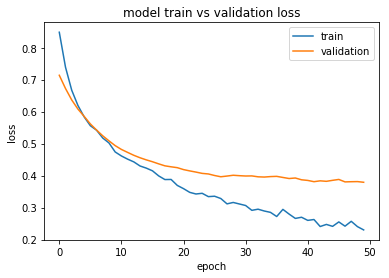

In [70]:
# PLot train and validation runs for loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

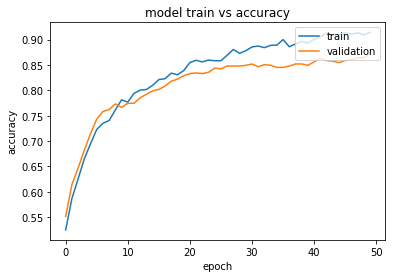

In [71]:
# PLot train and validation runs for accuracy
pyplot.plot(history.history['acc'])
pyplot.plot(history.history['val_acc'])
pyplot.title('model train vs accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [72]:
# Create deep model loss dataframe
deep_model_loss_df = pd.DataFrame({'loss': history.history['loss'], 'val_loss': history.history['val_loss']})
deep_model_loss_df.head()

,loss,val_loss
0,0.848192,0.713682
1,0.738920,0.672329
2,0.667055,0.636567
3,0.619277,0.608013
4,0.583735,0.585259


In [73]:
# Create deep model accuracy dataframe
deep_model_accuracy_df = pd.DataFrame({'acc': history.history['acc'], 'val_acc': history.history['val_acc']})
deep_model_accuracy_df.head()

,acc,val_acc
0,0.524909,0.551630
1,0.586504,0.614130
2,0.625453,0.646739
3,0.664855,0.682065
4,0.694746,0.714674


In [74]:
# Export deep model loss and accuracy dataframes to CSVs
deep_model_loss_df.to_csv('deep_model_loss.csv')
deep_model_accuracy_df.to_csv('deep_model_accuracy.csv')

In [75]:
# Print classification report for deep learning model
y_pred = deep_model.predict(X_test_scaled, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_bool))

736/736 [==============================] - 0s 110us/sample
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67       368
         1.0       0.00      0.00      0.00       368

   micro avg       0.50      0.50      0.50       736
   macro avg       0.25      0.50      0.33       736
weighted avg       0.25      0.50      0.33       736

